<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle
from scipy import stats

In [14]:
data = pd.read_excel("/content/Load Data in kW.xlsx")
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


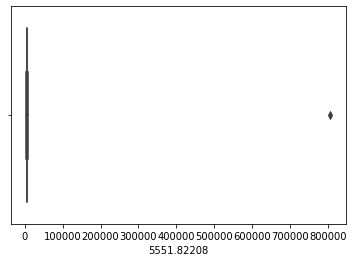

In [16]:
sns.boxplot(data.iloc[:,0])

In [18]:
z = np.abs(stats.zscore(data.iloc[:,0]))
print(np.where(z > 3))

(array([928]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


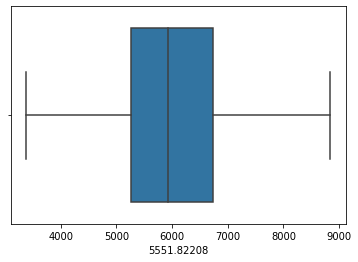

In [19]:
data.iloc[928,0] = data.iloc[927,0]
sns.boxplot(data.iloc[:,0])

In [24]:
x = []
y = []
for i in range(len(data.iloc[:,0])-24):
  x.append(data.iloc[i,0])
  y.append(data.iloc[i+24,0])

In [25]:
x = minmax_scale(x)
y = minmax_scale(y)
data_n = []
for i in range(len(x)):
  data_n.append((x[i],y[i]))
print(len(data_n))
train_data_n,test_data_n = train_test_split(data_n,test_size=0.1)
len(train_data_n)

2159


1943

In [30]:
m = 1
c = 1
learning_rate = 0.01
epochs = 10
batch_size = 200
v_m = 0
v_c = 0
momentum_coefficient = 0.9
def gradient_of_m(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradient_of_c(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [31]:
error_list = []
number_of_batches = (len(train_data_n)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = train_data_n[j*batch_size:]
    else:
      d = train_data_n[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c)
    v_m = v_m*momentum_coefficient + delta_m
    v_c = v_c*momentum_coefficient + delta_c
    m = m + v_m
    c = c + v_c
    print(" error {}".format(error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(train_data_n)
  

 error 0.48886758152522103
 error 0.47672457287480974
 error 0.4535646889905135
 error 0.4053734319782428
 error 0.37403608886046685
 error 0.31968851497192236
 error 0.27702947770229824
 error 0.2251658043446985
 error 0.17979648591863132
 error 0.16574998225842172
 error 0.122382559008366
 error 0.08953317594020829
 error 0.0686311547455783
 error 0.05459344505319096
 error 0.03482841408696408
 error 0.02375295734441778
 error 0.015161180215073244
 error 0.01111033902431391
 error 0.008631679954928789
 error 0.01062486511332312
 error 0.009708767103038191
 error 0.012351381630176628
 error 0.01399631763580113
 error 0.018866673419526792
 error 0.022010721683720237
 error 0.02440006625437834
 error 0.025908656681341923
 error 0.02481134217672134
 error 0.02488149486753826
 error 0.029164422039929555
 error 0.03191300008474019
 error 0.026326292793892665
 error 0.026903512104889435
 error 0.027997699614776397
 error 0.022781049220674192
 error 0.02112418345618447
 error 0.0189632546047

In [32]:
print(m,c)

0.630310095030101 0.1751865275068609


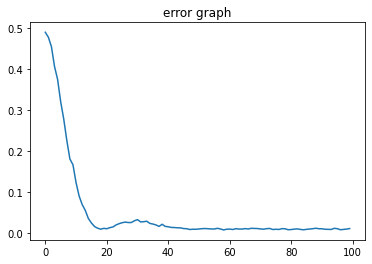

In [33]:
plt.title("error graph")
x_1 = range(len(error_list))
y_1 = error_list
plt.plot(x_1,y_1)

In [34]:
print("train error :",error(train_data_n,m,c))
print("test error :",error(test_data_n,m,c))

train error : 0.008859856659951853
test error : 0.008579840867179582


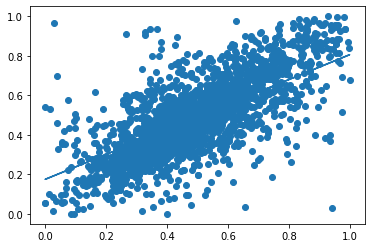

In [35]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [36]:
input_load = float(input("enter yesterday load : "))
maximum_value = 8841.669480
minimum_value = 3377.919600
input_load = (input_load - minimum_value)/(maximum_value-minimum_value)
output_load = input_load*m+c
output_load = output_load*(maximum_value-minimum_value)+minimum_value
print("predicted load is : ",output_load)

enter yesterday load : 5555.5
predicted load is :  5707.645877502913
